In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from fiber_properties import FiberImage
from matplotlib import rc, cycler
cmap = mpl.cm.get_cmap('inferno')
import os
import numpy as np

colors = ['black', 'red', 'orange', 'yellow', 'gray', 'pink']

rc('figure', figsize=[3.39, 3.0])
rc('text', usetex=True)
rc('text.latex', preamble= [r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
                            r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
#                             r'\usepackage{helvet}',    # set the normal font here
#                             r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
#                             r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
                            ])

rc('font', size=10, family='serif', serif=['Computer Modern Roman'])
rc('axes', labelsize=10, linewidth=1, unicode_minus=True,
   prop_cycle=cycler('color', colors))
rc('legend', frameon=False, fontsize=10, labelspacing=0.5, numpoints=1)
rc('lines', linewidth=1)

rc('xtick', labelsize=10, direction='in', top=True)
rc('xtick.major', size=4, width=1)
rc('xtick.minor', visible=True, size=2, width=1)

rc('ytick', labelsize=10, direction='in', right=True)
rc('ytick.major', size=4, width=1)
rc('ytick.minor', visible=True, size=2, width=1)

print 'Complete'


Complete


In [28]:
# Helpful functions for getting saved data

def image_base(folder, cam, im):
    if folder and not folder.endswith('/'):
        folder += '/'
    return folder + cam + '_' + str(im).zfill(3)

def object_file(folder, cam, num=10, start=0):
    if folder and not folder.endswith('/'):
        folder += '/'
    front = image_base(folder, cam, start)
    back = '_obj.pkl'
    if start == 0 and not os.path.exists(image_base(folder, cam, num) + '.fit'):
        return folder + cam + back
    elif num == 1:
        return front + back
    else:
        return front + '-' + str(start+num-1).zfill(3) + back

def populate_data(*args):
    for data in args:
        data['mn_x10'] = []
        data['mn_x1'] = []
        data['mn_time'] = []
        for test in data['tests']:
            folder = data['folder'] + test
            data['mn_x10'].append(FiberImage(object_file(folder, 'nf', 10, 0)).get_modal_noise(method='filter'))
            data['mn_x1'].append(0.0)
            for i in xrange(10):
                data['mn_x1'][-1] += FiberImage(object_file(folder, 'nf', 1, i)).get_modal_noise(method='filter') / 10.0
            
            mn_time = [data['mn_x1'][-1]]
            for i in xrange(1,10):
                mn_time.append(FiberImage(object_file(folder, 'nf', i+1, 0)).get_modal_noise(method='filter'))
            data['mn_time'].append(mn_time)
            
def populate_data_1x(*args):
    for data in args:
        data['mn_x10'] = []
        data['mn_x1'] = []
        for test in data['tests']:
            folder = data['folder'] + test
            data['mn_x10'].append(FiberImage(object_file(folder, 'nf', 10, 0)).get_modal_noise(method='filter'))
            data['mn_x1'].append(0.0)
            for i in xrange(10):
                data['mn_x1'][-1] += FiberImage(object_file(folder, 'nf', 1, i)).get_modal_noise(method='filter') / 10.0
                

print 'Complete'


Complete


In [29]:
# Populate the data

folder = 'C:/Libraries/Box Sync/ExoLab/Fiber_Characterization/Image Analysis/data/modal_noise/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/'

# Amplitude and frequency data

amp_data = {'name': 'amplitude',
            'folder': folder + 'rec_fiber_amp_tests/',
            'tests': ['agitated_15volts_40mm_2s',
                      'agitated_15volts_80mm_2s',
                      'agitated_15volts_120mm_2s',
                      'agitated_15volts_160mm_2s'],
            'x_val': [80, 160, 240, 320]}
lin_freq_data = {'name': 'linear frequency',
                 'folder': folder + 'rec_fiber_freq_tests/',
                 'tests': ['agitated_5volts_120mm_7.5s',
                           'agitated_10volts_120mm_3.2s',
                           'agitated_15volts_120mm_2s',
                           'agitated_20volts_120mm_1.5s',
                           'agitated_25volts_120mm_1.2s',
                           'agitated_30volts_120mm_1s'],
                 'x_val': [0.13, 0.31, 0.50, 0.67, 0.83, 1.00]}
circ_freq_data = {'name': 'circular frequency',
                  'folder': folder + 'rec_fiber_freq_tests/circular_ag/',
                  'tests': ['agitated_5volts_6.3s',
                            'agitated_10volts_2.6s',
                            'agitated_15volts_1.7s',
                            'agitated_20volts_1.2s'],
                  'x_val': [0.16, 0.38, 0.59, 0.83]}
unagitated_data = {'name': 'unagitated',
                   'folder': folder + 'rec_fiber_freq_tests/',
                   'tests': ['unagitated_1s/']}

amp_freq_data = [amp_data, lin_freq_data, circ_freq_data, unagitated_data]
populate_data(*amp_freq_data)


print 'Complete'


Complete


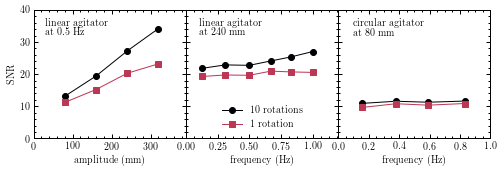

In [30]:
# Plot the amplitude and frequency data as 1x and 10x SNR

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=[7.10, 2.5])

for data, ax in zip(amp_freq_data[:-1], (ax1, ax2, ax3)):
    ax.plot(data['x_val'], data['mn_x10'], marker='o', label='10 rotations', color=cmap(0))
    ax.plot(data['x_val'], data['mn_x1'], marker='s', label='1 rotation', color=cmap(0.5))
    

# ax1.plot(amp_data['amp'], amp_data['mn_x10'], marker='o', label='10 rotations')
# ax1.plot(amp_data['amp'], amp_data['mn_x1'], marker='s', label='1 rotation')
ax1.set_xlabel('amplitude (mm)')
ax1.set_ylabel('SNR')
ax1.set_xlim(0,390)
ax1.set_ylim(0,40)
ax1.text(30, 32, 'linear agitator \n at 0.5 Hz')

# ax2.plot(lin_freq_data['freq'], lin_freq_data['mn_x10'], marker='o', label='10 rotations')
# ax2.plot(lin_freq_data['freq'], lin_freq_data['mn_x1'], marker='s', label='1 rotation')
ax2.set_xlabel('frequency (Hz)')
ax2.set_xlim(0,1.2)
ax2.legend(loc='lower center')
ax2.text(0.1, 32, 'linear agitator \n at 240 mm')


# ax3.plot(circ_freq_data['freq'], circ_freq_data['mn_x10'], marker='o', label='10 rotations')
# ax3.plot(circ_freq_data['freq'], circ_freq_data['mn_x1'], marker='s', label='1 rotation')
ax3.set_xlabel('frequency (Hz)')
ax3.set_xlim(0,1)
ax3.text(0.1, 32, 'circular agitator \n at 80 mm')

fig1.tight_layout()
fig1.subplots_adjust(wspace=0)
fig1.savefig('amp_freq_snr.pdf', dpi=600)


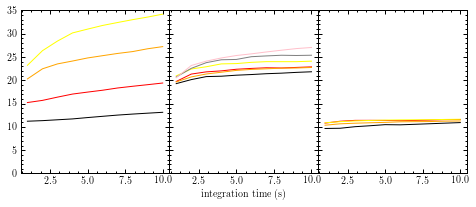

In [31]:
# Plot the amplitude and frequency data vs. integration time

fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=[8,3])

for mn_time in amp_data['mn_time']:
    ax1.plot(range(1,11), mn_time)
# ax1.set_xlabel(r'integration time (\SI{}{\second})')
ax1.set_ylim(0,35)

for mn_time in lin_freq_data['mn_time']:
    ax2.plot(range(1,11), mn_time) 
ax2.set_xlabel(r'integration time (s)')

for mn_time in circ_freq_data['mn_time']:
    ax3.plot(range(1,11), mn_time)
# ax3.set_xlabel(r'integration time (\SI{}{\second})')

fig2.subplots_adjust(wspace=0)

In [32]:
# Populate the agitation method data

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'

tests = ['unagitated', 'circular_agitation', 'linear_agitation', 'coupled_agitation']
labels = ['none', 'circular', 'linear', 'coupled']

circ_100_data = {'name': 'circular \\SI{100}{\micro\meter}',
                 'folder': folder + 'circular_100um/',
                 'tests': tests,
                 'labels': labels}

oct_100_data = {'name': 'octagonal \\SI{100}{\micro\meter}',
                'folder': folder + 'octagonal_100um/',
                'tests': tests,
                'labels': labels}

circ_200_data = {'name': 'circular \\SI{200}{\micro\meter}',
                 'folder': folder + 'circular_200um/',
                 'tests': tests + ['baseline'],
                 'labels': labels + ['LED source']}

oct_200_data = {'name': 'octagonal \\SI{200}{\micro\meter}',
                'folder': folder + 'octagonal_200um/',
                'tests': tests + ['baseline'],
                'labels': labels + ['LED source']}

rect_100x300_data = {'name': 'rectangular 100x\\SI{300}{\micro\meter}',
                     'folder': folder + 'rectangular_100x300um/',
                     'tests': tests + ['baseline'],
                     'labels': labels + ['LED source']}

ag_data = [circ_100_data, oct_100_data, circ_200_data, oct_200_data, rect_100x300_data]
populate_data(*ag_data)

print 'Complete'


Complete


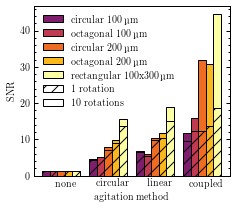

In [33]:
# Plot the agitation data

colors = [cmap(i) for i in np.linspace(0.35,1,5)]

num_tests = len(ag_data)
bar_width = 0.8 / num_tests
indexes = np.arange(4)

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])

handles = []
for i, (data, color) in enumerate(zip(ag_data, colors)):
    handles.append(ax.bar(indexes+0.1+i*bar_width, data['mn_x10'][:4],
                   bar_width, label=data['name'],
                   edgecolor='black', zorder=3, color=color))
    ax.bar(indexes+0.1+i*bar_width, data['mn_x1'][:4],
            bar_width, edgecolor='black', zorder=5,
            hatch='//', color=color)

ax.set_xticks(indexes+0.5)
ax.set_xticklabels(data['labels'][:4], rotation=0, ha='center')
ax.tick_params(axis='x', which='both', bottom='off', top='off')
ax.set_xlabel('agitation method')
ax.set_ylabel('SNR')
# ax.grid(which='major', axis='y', zorder=0)

handles.append(mpl.patches.Patch(color='white', ec='black', hatch='//', label='1 rotation'))
handles.append(mpl.patches.Patch(color='white', ec='black', label='10 rotations'))

color_legend = ax.legend(handles=handles, loc='upper left', framealpha=1)

fig.tight_layout()
fig.savefig('ag_snr.pdf', dpi=600)


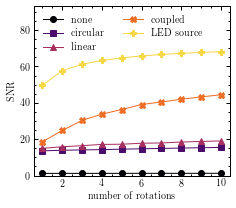

In [34]:
# Plot the SNR vs time data

markers = ['o', 's', '^', 'X', 'P']
colors = [cmap(i) for i in np.linspace(0,0.9,5)]

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])
# colors = np.linspace(0, 1, len(rect_100x300_data['labels']))

for (mn_time, label, color, marker) in zip(rect_100x300_data['mn_time'], rect_100x300_data['labels'], colors, markers):
    ax.plot(range(1,11), mn_time, marker=marker, color=color, label=label)
    
ax.set_ylim(0,93)
ax.set_xlabel('number of rotations')
ax.set_ylabel('SNR')
ax.legend(loc='upper left', ncol=2)

fig.tight_layout()

fig.savefig('rect_snr_vs_time.pdf')

In [35]:
# Populate the coupled fiber data

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/coupled_fibers/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/coupled_fibers/'

labels = ['neither', 'first', 'second', 'both']
tests = ['unagitated', 'agitated_first', 'agitated_second', 'agitated_both']

same_data = {'name': r'200-\SI{200}{\micro\meter}',
             'folder': folder + '200-200um_test2/',
             'tests': tests,
             'labels': labels}

shape_data = {'name': r'\SI{200}{\micro\meter} oct-circ',
              'folder': folder + 'oct-circ-200um/',
              'tests': ['unagitated', 'agitated_oct', 'agitated_circ', 'agitated_both'],
              'labels': labels}

size_data = {'name': r'100-\SI{200}{\micro\meter}',
                 'folder': folder + '100-200um/',
                 'tests': ['unagitated', 'agitated_first_100um', 'agitated_second_200um', 'agitated_both'],
                 'labels': labels}

single_data = {'name': r'\SI{200}{\micro\meter}',
               'folder': 'C:/Libraries/Google Drive/Yale/Research/fiber_data/modal_noise/amp_freq_200um/',
               'tests': ['agitated_30volts_40mm_1s']}

cf_data = [size_data, same_data, shape_data]
populate_data_1x(single_data, *cf_data)

print 'Complete'


Complete


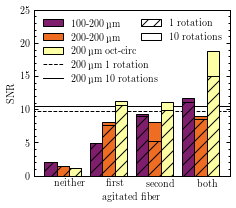

In [42]:
# Plot the coupled fiber data

colors = [cmap(i) for i in np.linspace(0.35,1,3)]

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])

num_tests = len(cf_data)
bar_width = 0.8 / num_tests
indexes = np.arange(4)

handles = []
for i, (data, color) in enumerate(zip(cf_data, colors)):
    ax.bar(indexes+0.1+i*bar_width, data['mn_x10'],
           bar_width, label=data['name'],
           edgecolor='black', zorder=3, color=color)
    ax.bar(indexes+0.1+i*bar_width, data['mn_x1'],
            bar_width, edgecolor='black', zorder=5,
            hatch='//', color=color)

ax.plot(np.linspace(-1, 4, 4), [single_data['mn_x1'][0] for i in xrange(4)], '--', color='black', label='\\SI{200}{\micro\meter} 1 rotation')
ax.plot(np.linspace(-1, 4, 4), [single_data['mn_x10'][0] for i in xrange(4)], '-', color='black', label='\\SI{200}{\micro\meter} 10 rotations')

handles, labels = ax.get_legend_handles_labels()
handles = handles[2:] + handles[:2]
labels = labels[2:] + labels[:2]
first_legend = ax.legend(handles=handles, labels=labels, loc='upper left')
plt.gca().add_artist(first_legend)

handles = []
handles.append(mpl.patches.Patch(color='white', ec='black', hatch='//', label='1 rotation'))
handles.append(mpl.patches.Patch(color='white', ec='black', label='10 rotations'))
line_legend = ax.legend(handles=handles, loc='upper right')

ax.set_xticks(indexes+0.5)
ax.set_xticklabels(data['labels'], rotation=0, ha='center')
ax.tick_params(axis='x', which='both', bottom='off', top='off')
ax.set_xlabel('agitated fiber')
ax.set_ylabel('SNR')
ax.set_ylim(0,25)
ax.set_xlim(-bar_width,4)
# ax.grid(which='major', axis='y', zorder=0)

fig.tight_layout()

fig.savefig('coupled_fibers.pdf')

In [37]:
# Populate the tweeter data

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/tweeter_exp/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/tweeter_exp/'

labels = ['none', 'tweeter', 'coupled', 'both']
tests = ['unagitated', 'tweeter_solo', 'coupled_ag', 'coupled_tweeting']

tweeter_data = {'name': '',
             'folder': folder,
             'tests': tests,
             'labels': labels}

populate_data(tweeter_data)


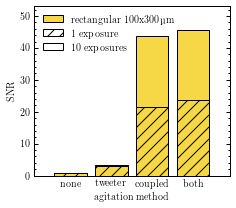

In [38]:
# Plot the tweeter data

color = cmap(0.9)

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])

bar_width = 0.8
indexes = np.arange(len(tweeter_data['mn_x10']))

ax.bar(indexes+0.1, tweeter_data['mn_x10'],
       bar_width, label=data['name'],
       edgecolor='black', zorder=3, color=color)
ax.bar(indexes+0.1, tweeter_data['mn_x1'],
        bar_width, edgecolor='black', zorder=5,
        hatch='//', color=color)

handles = []
handles.append(mpl.patches.Patch(color=color, ec='black', label='rectangular 100x\\SI{300}{\micro\meter}'))
handles.append(mpl.patches.Patch(color='white', ec='black', hatch='//', label='1 exposure'))
handles.append(mpl.patches.Patch(color='white', ec='black', label='10 exposures'))
line_legend = ax.legend(handles=handles, loc='upper left')

ax.set_xticks(indexes+0.1)
ax.set_xticklabels(tweeter_data['labels'], rotation=0, ha='center')
ax.tick_params(axis='x', which='both', bottom='off', top='off')
ax.set_xlabel('agitation method')
ax.set_ylabel('SNR')
ax.set_ylim(0, 53)
ax.set_xlim(-bar_width, len(tweeter_data['mn_x10']))

fig.tight_layout()

fig.savefig('tweeter_snr.pdf', dpi=600)


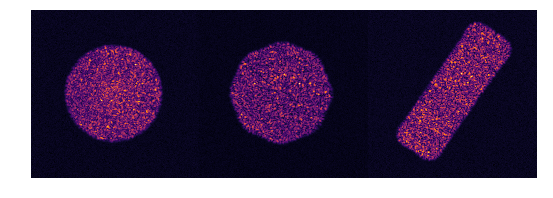

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[7.1, 2.3666666])

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'

im1 = FiberImage(folder + 'circular_200um/unagitated/nf_000.fit').get_image()
im2 = FiberImage(folder + 'octagonal_200um/unagitated/nf_000.fit').get_image()
im3 = FiberImage(folder + 'rectangular_100x300um/unagitated/nf_000.fit').get_image()[100:1100, 100:1100]

for (ax, im) in zip((ax1, ax2, ax3), (im1, im2, im3)):
    ax.imshow((im-np.min(im)+1)**(.6), cmap='inferno')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)
    ax.axis('off')

ax1.set_position([0, 0, .33, 1])
ax2.set_position([.33, 0, .33, 1])
ax3.set_position([.66, 0, .33, 1])
    
fig1.tight_layout()
fig1.subplots_adjust(wspace=0)

fig.savefig('fiber_example.pdf', dpi=600)


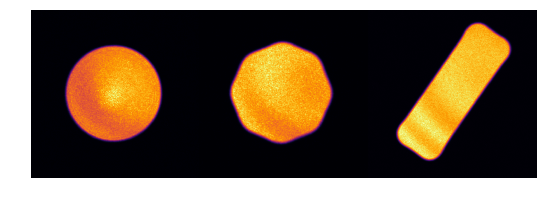

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[7.1, 2.3666666])

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'

im1 = FiberImage(folder + 'circular_200um/coupled_agitation/nf_corrected.fit').get_image()
im2 = FiberImage(folder + 'octagonal_200um/coupled_agitation/nf_corrected.fit').get_image()
im3 = FiberImage(folder + 'rectangular_100x300um/coupled_agitation/nf_corrected.fit').get_image()[100:1100, 100:1100]

for (ax, im) in zip((ax1, ax2, ax3), (im1, im2, im3)):
    ax.imshow((im-np.min(im)+1), cmap='inferno')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)
    ax.axis('off')

ax1.set_position([0, 0, .33, 1])
ax2.set_position([.33, 0, .33, 1])
ax3.set_position([.66, 0, .33, 1])
    
fig1.tight_layout()
fig1.subplots_adjust(wspace=0)

fig.savefig('fiber_improved.pdf', dpi=600)


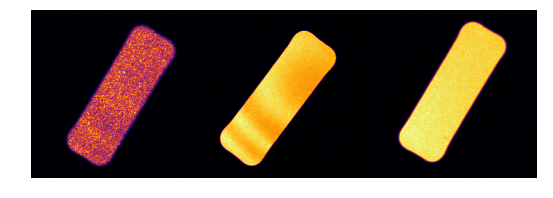

In [41]:
from fiber_properties import image_list

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[7.1, 2.3666666])

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/rv_error/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/rv_error/'

im1 = FiberImage(image_list(folder + 'slow_agitation/nf_', num=10, start=0)).get_image()[100:1100, 100:1100]
im2 = FiberImage(image_list(folder + 'coupled_ag_new/nf_', num=10, start=0)).get_image()[100:1100, 100:1100]
im3 = FiberImage(image_list(folder + 'LED/nf_', num=10, start=0)).get_image()[100:1100, 100:1100]

for (ax, im) in zip((ax1, ax2, ax3), (im1, im2, im3)):
    ax.imshow((im-np.min(im)+1), cmap='inferno')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)
    ax.axis('off')

ax1.set_position([0, 0, .33, 1])
ax2.set_position([.33, 0, .33, 1])
ax3.set_position([.66, 0, .33, 1])
    
fig1.tight_layout()
fig1.subplots_adjust(wspace=0)

fig.savefig('fiber_rv_error.pdf', dpi=600)
